In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class Network (nn.Module):
    def __init__(self,inputs,hidden,outputs):
        super(Network,self).__init__()
        self.inputs=inputs
        self.hidden=hidden
        self.outputs=outputs
        self.active=nn.Sigmoid()
        if self.hidden==0 :
            self.fc1=nn.Linear(inputs,outputs)
        else :
            self.fc1=nn.Linear(inputs,hidden)
            self.fc2=nn.Linear(hidden,outputs)
            
            
               
            
    def forward (self,v):
        if self.hidden==0 :
            out = self.active(self.fc1(v))
        else :
            out = self.active(self.fc2(self.active(self.fc1(v))))
        return out
    
def train (X,Y,epoch,rate,NET):
    X = X.float()
    Y = Y.float()
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(NET.parameters(),rate)
    optimizer.zero_grad()
    loss_monit=np.zeros([2,epoch])
    
    
    for i in range(epoch):
        y = NET.forward(X)
        loss = criterion(y,Y)
        loss_monit[0,i] = i
        loss_monit[1,i] = loss
        loss.backward()
        optimizer.step()
        
       
         
    
    
    weights1 = NET.fc1.weight.data
    weights2 = NET.fc2.weight.data
    
   
    
    
    return weights1,weights2,loss_monit[0,:],loss_monit[1,:]




def batch(X1,Y1,batch_size):
    X2 = []
    Y2 = []

    for i in range(0, batch_size):
            
            
        
            X2.append(X1)
            Y2.append(Y1)
        
    X2 = torch.cat(X2, 0)
    Y2 = torch.cat(Y2, 0)
    return X1,Y1    

class Network2(nn.Module): # multi layer deep nn

    def __init__(self, input_size,hidden_size,output_size,num_of_layers):

        super(Network2, self).__init__()  # one hidden layer
        self.num_of_layers = num_of_layers
        self.activ=nn.Sigmoid()
        self.inputSize = input_size
        self.outputSize = output_size
        self.hiddenSize = hidden_size
        
        if self.num_of_layers == 1:
            self.W1 = nn.Linear(self.inputSize, self.outputSize)  # i X h tensor in to hidden 1

        if self.num_of_layers == 2:
            self.W1 = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.W2 = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.num_of_layers == 3:
            self.W1 = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.W2 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W3 = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.num_of_layers == 4:
            self.W1 = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.W2 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.W3 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W4 = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out

        if self.num_of_layers == 5:
            self.W1 = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.W2 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.W3 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W4 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W5 = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out
            
        if self.num_of_layers == 6:
            self.W1 = nn.Linear(self.inputSize, self.hiddenSize)  # i X h tensor in to hidden 1
            self.W2 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 1 to hidden 2
            self.W3 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W4 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W5 = nn.Linear(self.hiddenSize, self.hiddenSize)  # h X h tensor hidden 2 to hidden 3
            self.W6 = nn.Linear(self.hiddenSize, self.outputSize)  # h X o tensor hidden 3 to out
            
        return

    def forward2(self, x):

        if self.num_of_layers == 1:
            
            out = self.W1(x)
            out = self.activ(out)

        elif self.num_of_layers == 2:
            
            out = self.W1(x)
            out = self.activ(out)
            out = self.W2(out)
            out = self.activ(out)
            
        elif self.num_of_layers == 3:
            
            out = self.W1(x)
            out = self.activ(out)
            out = self.W2(out)
            out = self.activ(out)

            out = self.W3(out)
            out = self.activ(out)
            
        elif self.num_of_layers == 4:
            
            out = self.W1(x)
            out = self.activ(out)
            out = self.W2(out)
            out = self.activ(out)
    
            out = self.W3(out)
            out = self.activ(out)
            out = self.W4(out)
            out = self.activ(out)

        elif self.num_of_layers == 5:
            
            out = self.W1(x)
            out = self.activ(out)
            out = self.W2(out)
            out = self.activ(out)
    
            out = self.W3(out)
            out = self.activ(out)
            out = self.W4(out)
            out = self.activ(out)
            
            out = self.W5(out)
            out = self.activ(out)
        elif self.num_of_layers == 6:
            
            out = self.W1(x)
            out = self.activ(out)
            out = self.W2(out)
            out = self.activ(out)
    
            out = self.W3(out)
            out = self.activ(out)
            out = self.W4(out)
            out = self.activ(out)
            
            out = self.W5(out)
            out = self.activ(out)
            out = self.W6(out)
            out = self.activ(out)
            
        return out

def train2 (X,Y,epoch,rate,NET):
    X = X.float()
    Y = Y.float()
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(NET.parameters(),rate)
    optimizer.zero_grad()
    loss_monit=np.zeros([2,epoch])
    
    
    for i in range(epoch):
        y = NET.forward2(X)
        loss = criterion(y,Y)
        loss_monit[0,i] = i
        loss_monit[1,i] = loss
        loss.backward()
        optimizer.step()
        
       
         
    
    
    
   
    
    
    return loss_monit[0,:],loss_monit[1,:]


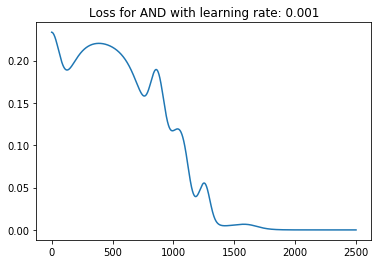

In [2]:
net= Network(3,2,1)
X=torch.tensor([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

Y=torch.tensor([[0],[0],[0],[1]])

k,s,m,n=train(X,Y,2500,0.001,net)

plt.plot(m,n)
plt.title('Loss for AND with learning rate: '+str(0.001)) 
plt.show()


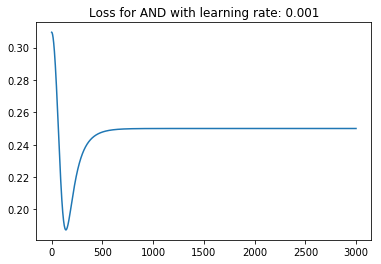

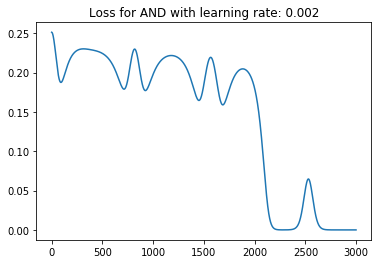

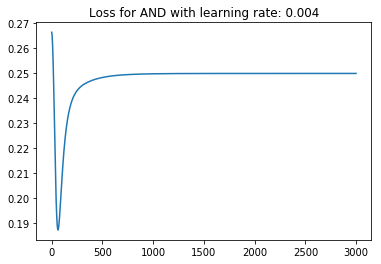

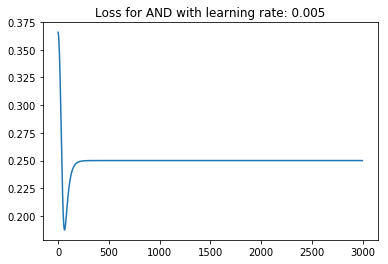

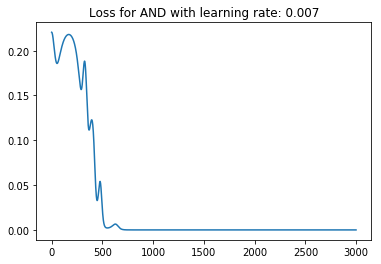

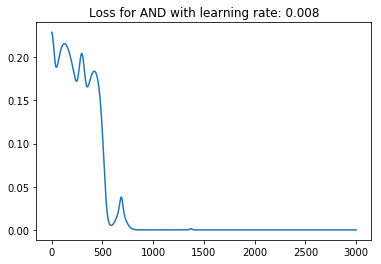

In [7]:




net1 = Network(3,1,1)
net2 = Network(3,1,1)
net3 = Network(3,1,1)
net4 = Network(3,1,1)
net5 = Network(3,1,1)
net6 = Network(3,1,1)

x2 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

k,s,m1,n1=train(x2, y2, 3000,0.001,net1)
k,s,m2,n2=train(x2, y2, 3000,0.002,net2)
k,s,m3,n3=train(x2, y2, 3000,0.004,net3)
k,s,m4,n4=train(x2, y2, 3000,0.005,net4)
k,s,m5,n5=train(x2, y2, 3000,0.007,net5)
k,s,m6,n6=train(x2, y2, 3000,0.008,net6)



plt.plot(m1,n1)
plt.title('Loss for AND with learning rate: '+str(0.001)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for AND with learning rate: '+str(0.002)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for AND with learning rate: '+str(0.004)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for AND with learning rate: '+str(0.005)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for AND with learning rate: '+str(0.007)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for AND with learning rate: '+str(0.008)) 
plt.show()


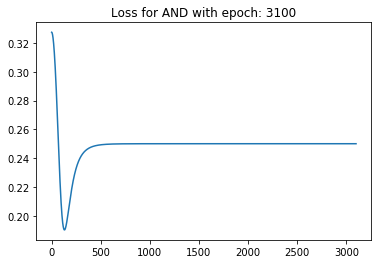

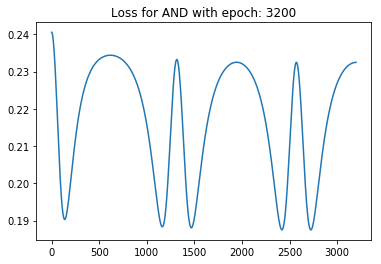

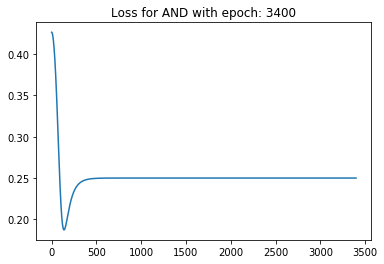

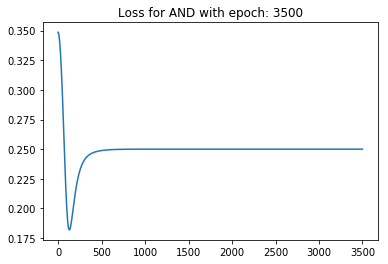

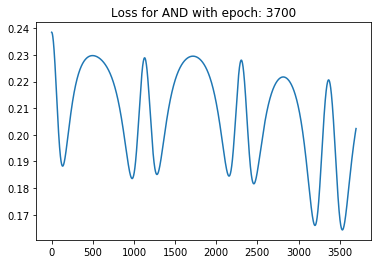

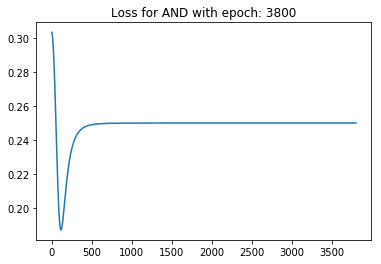

In [12]:




net1 = Network(3,1,1)
net2 = Network(3,1,1)
net3 = Network(3,1,1)
net4 = Network(3,1,1)
net5 = Network(3,1,1)
net6 = Network(3,1,1)

x2 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

k,s,m1,n1=train(x2, y2, 3100,0.001,net1)
k,s,m2,n2=train(x2, y2, 3200,0.001,net2)
k,s,m3,n3=train(x2, y2, 3400,0.001,net3)
k,s,m4,n4=train(x2, y2, 3500,0.001,net4)
k,s,m5,n5=train(x2, y2, 3700,0.001,net5)
k,s,m6,n6=train(x2, y2, 3800,0.001,net6)



plt.plot(m1,n1)
plt.title('Loss for AND with epoch: '+str(3100)) # for AND : AND
plt.show()



plt.plot(m2,n2)
plt.title('Loss for AND with epoch: '+str(3200)) # for AND : AND
plt.show()



plt.plot(m3,n3)
plt.title('Loss for AND with epoch: '+str(3400)) # for AND : AND
plt.show()



plt.plot(m4,n4)
plt.title('Loss for AND with epoch: '+str(3500)) # for AND : AND
plt.show()


plt.plot(m5,n5)
plt.title('Loss for AND with epoch: '+str(3700)) # for AND : AND
plt.show()


plt.plot(m6,n6)
plt.title('Loss for AND with epoch: '+str(3800)) # for AND : AND
plt.show()


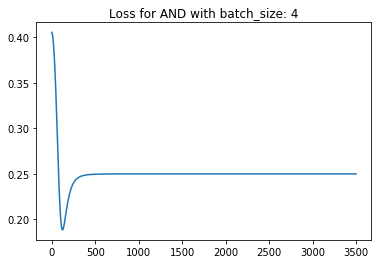

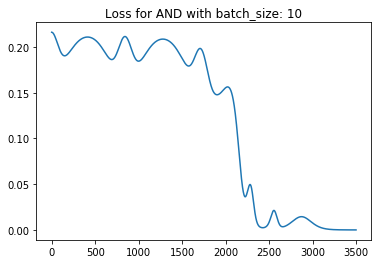

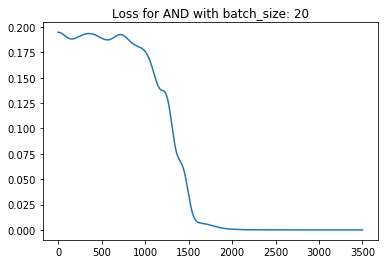

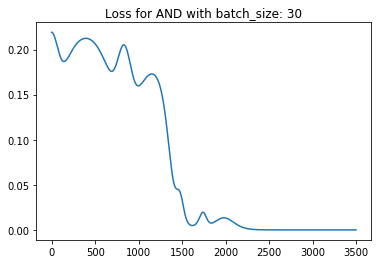

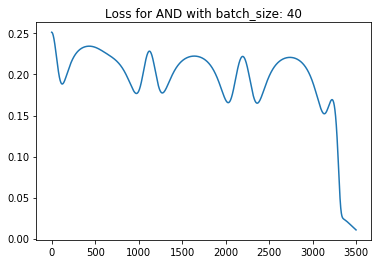

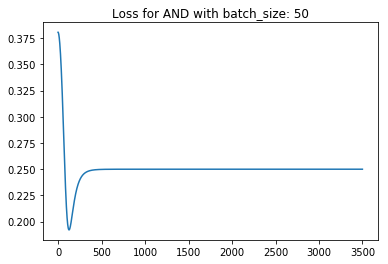

In [10]:






net1 = Network(3,1,1)
net2 = Network(3,1,1)
net3 = Network(3,1,1)
net4 = Network(3,1,1)
net5 = Network(3,1,1)
net6 = Network(3,1,1)

x1 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y1 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

k,s,m1,n1=train(x1, y1, 3500,0.001,net1)

x2,y2=batch(x1,y1,10)
k,s,m2,n2=train(x2, y2, 3500,0.001,net2)

x3,y3=batch(x1,y1,20)
k,s,m3,n3=train(x3, y3, 3500,0.001,net3)

x4,y4=batch(x1,y1,30)
k,s,m4,n4=train(x4, y4, 3500,0.001,net4)

x5,y5=batch(x1,y1,40)
k,s,m5,n5=train(x5, y5, 3500,0.001,net5)

x6,y6=batch(x1,y1,50)
k,s,m6,n6=train(x6, y6, 3500,0.001,net6)



plt.plot(m1,n1)
plt.title('Loss for AND with batch_size: '+str(4)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for AND with batch_size: '+str(10)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for AND with batch_size: '+str(20)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for AND with batch_size: '+str(30)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for AND with batch_size: '+str(40)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for AND with batch_size: '+str(50)) 
plt.show()




Text(0.5,1,'hidden to output')

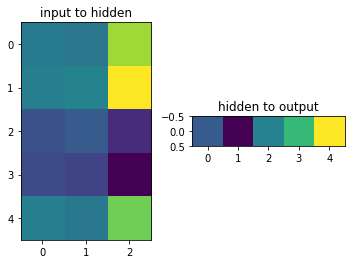

In [16]:



x2 = torch.tensor([[1.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 1.0], [0.0, 0.0, 1.0]])
y2 = torch.tensor([[1.0], [-1.0], [-1.0], [-1.0]])

net= Network(3,5,1)

k,s,m,n=train(x2,y2,2500,0.001,net)

plt.subplot(1,2,1)
plt.imshow(k)
plt.title('input to hidden')
    
plt.subplot(1,2,2)
plt.imshow(s)
plt.title('hidden to output')


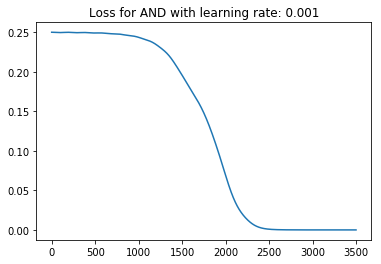

In [166]:
net= Network(3,5,1)

X=torch.tensor([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])

Y=torch.tensor([[0],[1],[1],[0]])

k,s,m,n=train(X,Y,3500,0.001,net)

plt.plot(m,n)
plt.title('Loss for XOR with learning rate: '+str(0.001)) # for AND : AND
plt.show()


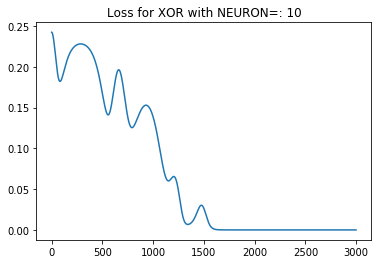

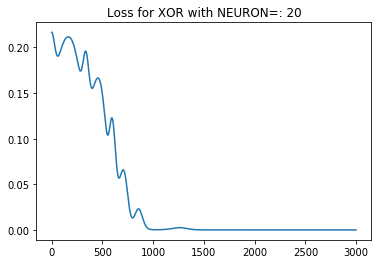

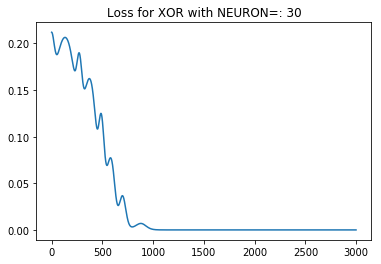

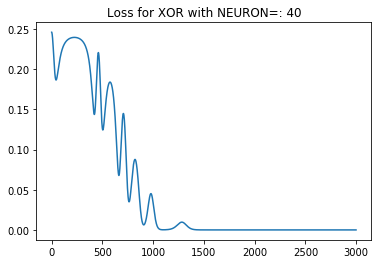

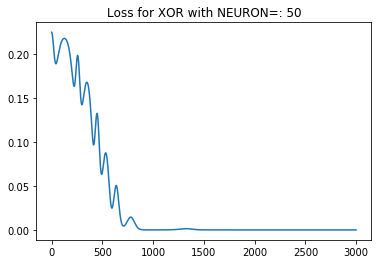

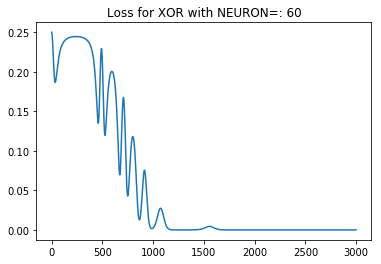

In [18]:
net1 = Network(4,10,1)
net2 = Network(4,20,1)
net3 = Network(4,30,1)
net4 = Network(4,40,1)
net5 = Network(4,50,1)
net6 = Network(4,60,1)

x2 = torch.tensor([[1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

k,s,m1,n1=train(x2, y2, 3000,0.001,net1)
k,s,m2,n2=train(x2, y2, 3000,0.001,net2)
k,s,m3,n3=train(x2, y2, 3000,0.001,net3)
k,s,m4,n4=train(x2, y2, 3000,0.001,net4)
k,s,m5,n5=train(x2, y2, 3000,0.001,net5)
k,s,m6,n6=train(x2, y2, 3000,0.001,net6)



plt.plot(m1,n1)
plt.title('Loss for XOR with NEURON=: '+str(10)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for XOR with NEURON=: '+str(20)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for XOR with NEURON=: '+str(30)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for XOR with NEURON=: '+str(40)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for XOR with NEURON=: '+str(50)) 
plt.show()


plt.plot(m6,n6)
plt.title('Loss for XOR with NEURON=: '+str(60)) 
plt.show()


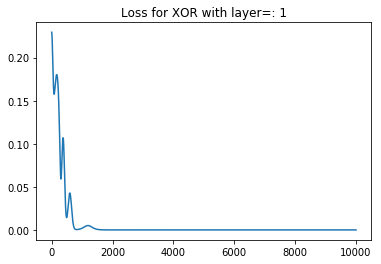

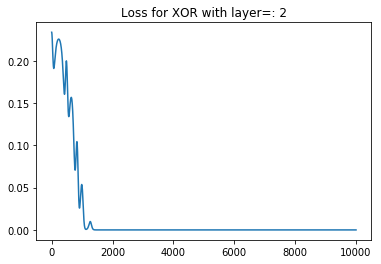

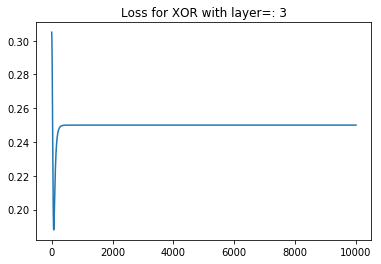

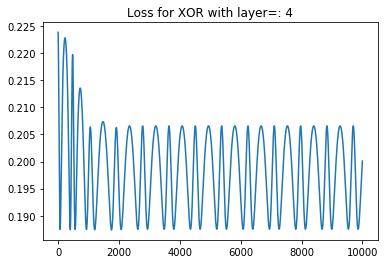

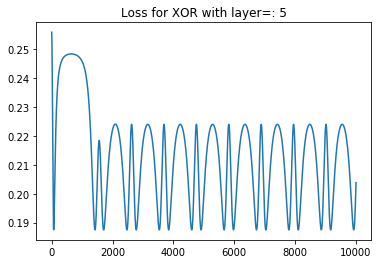

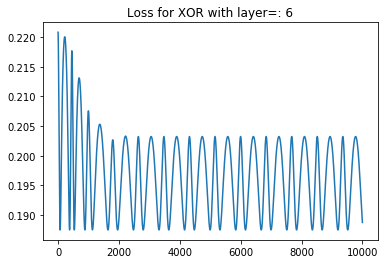

In [24]:
net1 = Network2(4,15,1,1)
net2 = Network2(4,15,1,2)
net3 = Network2(4,15,1,3)
net4 = Network2(4,15,1,4)
net5 = Network2(4,15,1,5)
net6 = Network2(4,15,1,6)

x2 = torch.tensor([[1.0, 1.0, 1.0, 1.0], [1.0, 0.0, 1.0, 1.0], [0.0, 1.0, 1.0, 1.0], [0.0, 0.0, 1.0, 1.0]])
y2 = torch.tensor([[1.0], [0.0], [0.0], [0.0]])

m1,n1=train2(x2, y2, 10000,0.001,net1)
m2,n2=train2(x2, y2, 10000,0.001,net2)
m3,n3=train2(x2, y2, 10000,0.001,net3)
m4,n4=train2(x2, y2, 10000,0.001,net4)
m5,n5=train2(x2, y2, 10000,0.001,net5)
m6,n6=train2(x2, y2, 10000,0.001,net6)



plt.plot(m1,n1)
plt.title('Loss for XOR with layer=: '+str(1)) 
plt.show()



plt.plot(m2,n2)
plt.title('Loss for XOR with layer=: '+str(2)) 
plt.show()



plt.plot(m3,n3)
plt.title('Loss for XOR with layer=: '+str(3)) 
plt.show()



plt.plot(m4,n4)
plt.title('Loss for XOR with layer=: '+str(4)) 
plt.show()


plt.plot(m5,n5)
plt.title('Loss for XOR with layer=: '+str(5))  
plt.show()


plt.plot(m6,n6)
plt.title('Loss for XOR with layer=: '+str(6)) 
plt.show()
